In [128]:
import pandas as pd
import numpy as np
import utils
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [3]:
def generate_condition(means,
                       stds,
                       n,
                       condition,
                       plot = True):
    measure = np.random.normal(means,stds,size = (n,len(means))).flatten('F')
    measure[np.where(measure < 0)] = 0
    condition_ = [condition] * len(measure)
    time = np.repeat(np.arange(1,len(means) + 1),n)
    sub = np.tile(np.arange(1,n+1),len(means))
    df = pd.DataFrame(np.vstack([measure,
                                 condition_,
                                 time,
                                 sub]).T,
                     columns = ['measure',
                                'condition',
                                'time',
                                'sub'])
    if plot:
        g = sns.catplot(x='time',
                        y='measure',
                        data=df,
                        kind = 'point')
        g.fig.suptitle(f'condition {condition}')
    return df

[[0.52694302 0.52881    0.57825389 0.6055558  0.60082083]
 [0.50128146 0.51258669 0.58996381 0.58262084 0.63838644]
 [0.50587385 0.51428835 0.57531532 0.61500798 0.62608902]
 [0.50883504 0.5254748  0.57071331 0.59211468 0.62052825]]
[[0.04590585 0.05957887 0.03961123 0.03888539 0.08931561]
 [0.07786812 0.05185816 0.05563492 0.06538045 0.07492869]
 [0.07014379 0.02407558 0.05549983 0.05457826 0.07705834]
 [0.06772859 0.00996725 0.04256315 0.08338051 0.04122861]]


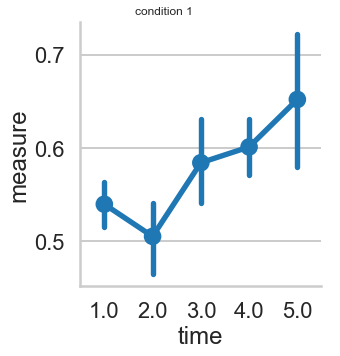

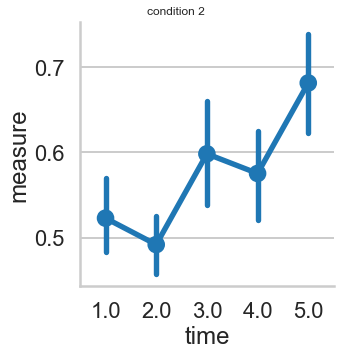

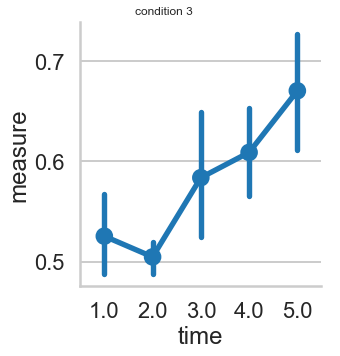

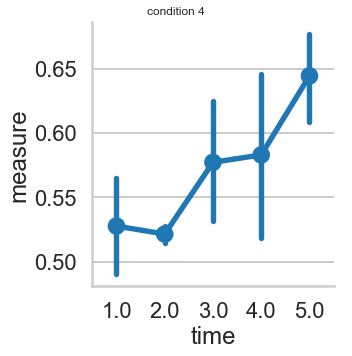

In [26]:
n = 7
means = np.vstack([np.random.uniform(0.5,0.53,size = 4),
                   np.random.uniform(0.51,0.54,size = 4),
                   np.random.uniform(0.53,0.6,size = 4),
                   np.random.uniform(0.57,0.62,size = 4),
                   np.random.uniform(0.6,0.64,size = 4),]).T
print(means)
np.random.seed(12345)
stds = np.random.normal(loc=0.05,scale=0.02,size=means.shape)
print(stds)
df = []
for ii,(mean,std) in enumerate(zip(means,stds)):
    np.random.seed(12345)
    temp = generate_condition(mean,std,
                              n = n,
                              condition = ii + 1,
                              )
    df.append(temp)
df = pd.concat(df)

# putting every together

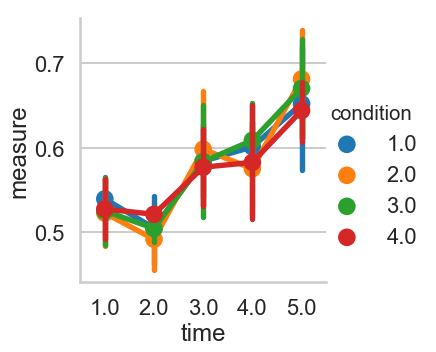

In [27]:
g = sns.catplot(x = 'time',
                y = 'measure',
                hue = 'condition',
                data = df,
                kind = 'point')

# Statsmodel method - only with balanced cells

In [28]:
from statsmodels.stats.anova import AnovaRM

In [29]:
anorm = AnovaRM(df,depvar='measure',subject='sub',within=['condition','time'])
res = anorm.fit()
print(res)

                    Anova
                Num DF  Den DF F Value Pr > F
---------------------------------------------
condition       3.0000 18.0000  0.7879 0.5163
time            4.0000 24.0000  7.0484 0.0007
condition:time 12.0000 72.0000  3.8360 0.0002



In [30]:
df.groupby('condition').describe()['measure']

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1.0,35.0,0.576554,0.080769,0.409555,0.532920,0.563525,0.602297,0.776396
2.0,35.0,0.574090,0.097411,0.408785,0.513400,0.570306,0.607711,0.785680
3.0,35.0,0.578690,0.089235,0.443768,0.515553,0.568051,0.609722,0.777569
4.0,35.0,0.570737,0.074580,0.436964,0.517216,0.568872,0.602828,0.731279


In [31]:
df.groupby('time').describe()['measure']

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
1.0,28.0,0.528985,0.051939,0.445719,0.489971,0.517394,0.574015,0.609783
2.0,28.0,0.505859,0.040102,0.408785,0.482134,0.519489,0.530234,0.557345
3.0,28.0,0.585935,0.077623,0.443768,0.554834,0.585926,0.604604,0.770719
4.0,28.0,0.592165,0.070281,0.436964,0.546160,0.594890,0.633540,0.731279
5.0,28.0,0.662146,0.080695,0.523942,0.590480,0.676119,0.729816,0.785680


# posthoc of the main effect (time) and interaction (condition x time)

In [33]:
df_time = utils.posthoc_multiple_comparison(df,
                                            depvar = 'measure',
                                            factor = 'time',
                                            n_ps = 100,
                                            n_permutation = int(1e4))

pairs: 10it [00:06,  1.67it/s]


# here we will always use Bonferroni correction for multiple comparison correcting

In [34]:
df_time

,ps_mean,ps_std,level1,level2,mean1,mean2,p_corrected
2,0.000100,5.421011e-20,4.0,1.0,0.592165,0.528985,0.001000
3,0.000100,5.421011e-20,5.0,1.0,0.662146,0.528985,0.001000
4,0.000100,5.421011e-20,3.0,2.0,0.585935,0.505859,0.001000
5,0.000100,5.421011e-20,4.0,2.0,0.592165,0.505859,0.001000
6,0.000100,5.421011e-20,5.0,2.0,0.662146,0.505859,0.001000
9,0.000173,8.700279e-05,5.0,4.0,0.662146,0.592165,0.001730
8,0.000428,1.822343e-04,5.0,3.0,0.662146,0.585935,0.004280
1,0.001668,3.643480e-04,3.0,1.0,0.585935,0.528985,0.016678
0,0.095030,2.700434e-03,1.0,2.0,0.528985,0.505859,0.950305
7,0.739024,3.713952e-03,4.0,3.0,0.592165,0.585935,1.000000


In [35]:
df_interaction = utils.posthoc_multiple_comparison_interaction(
                            df,
                            depvar = 'measure',
                            unique_levels = ['condition','time'],
                            )

interaction: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 10.78it/s]


In [37]:
def split(x,idx = 0):
    return x.split('_')[idx]

In [40]:
df_interaction['condition1'] = df_interaction['level1'].apply(split,idx = 0)
df_interaction['condition2'] = df_interaction['level2'].apply(split,idx = 0)
df_interaction['time1'] = df_interaction['level1'].apply(split, idx = 1)
df_interaction['time2'] = df_interaction['level2'].apply(split, idx = 1)
df_interaction['stars'] = df_interaction['p_corrected'].apply(utils.stars)
df_interaction.sort_values(['condition1','time1','condition2','time2'])

,ps_mean,ps_std,level1,level2,p_corrected,condition1,condition2,time1,time2,stars
0,0.229928,5.842026e-03,1.0_1.0,1.0_2.0,1.000000,1.0,1.0,1.0,2.0,n.s.
1,0.073085,4.093812e-03,1.0_3.0,1.0_1.0,1.000000,1.0,1.0,3.0,1.0,n.s.
4,0.000200,2.710505e-20,1.0_3.0,1.0_2.0,0.007998,1.0,1.0,3.0,2.0,**
2,0.000200,2.710505e-20,1.0_4.0,1.0_1.0,0.007998,1.0,1.0,4.0,1.0,**
5,0.002701,6.339048e-04,1.0_4.0,1.0_2.0,0.108058,1.0,1.0,4.0,2.0,n.s.
7,0.548752,6.596722e-03,1.0_4.0,1.0_3.0,1.000000,1.0,1.0,4.0,3.0,n.s.
3,0.000472,2.615122e-04,1.0_5.0,1.0_1.0,0.018876,1.0,1.0,5.0,1.0,*
6,0.000208,3.918400e-05,1.0_5.0,1.0_2.0,0.008318,1.0,1.0,5.0,2.0,**
8,0.109612,4.413644e-03,1.0_5.0,1.0_3.0,1.000000,1.0,1.0,5.0,3.0,n.s.
9,0.146359,4.553280e-03,1.0_5.0,1.0_4.0,1.000000,1.0,1.0,5.0,4.0,n.s.


# what if I want to do the ANOVA with resampling method?

In [146]:
results = []
from sklearn.utils import shuffle
for jj in tqdm(range(int(1e4))):
    df_resampled = df.copy()
    df_resampled['measure'] = np.random.choice(df_resampled['measure'].values,
                                               size = df_resampled.shape[0],
                                               replace = True,
                                               )
    res_temp = AnovaRM(df_resampled,depvar='measure',subject='sub',within=['condition','time']).fit()
    results.append(res_temp.anova_table.reset_index())

In [147]:
results = pd.concat(results)

In [148]:
print(res)

                    Anova
                Num DF  Den DF F Value Pr > F
---------------------------------------------
condition       3.0000 18.0000  0.7879 0.5163
time            4.0000 24.0000  7.0484 0.0007
condition:time 12.0000 72.0000  3.8360 0.0002



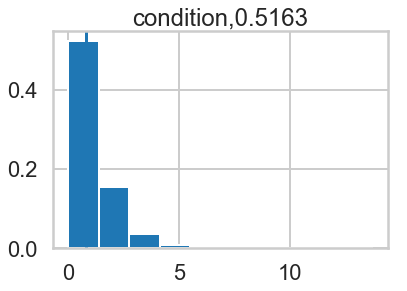

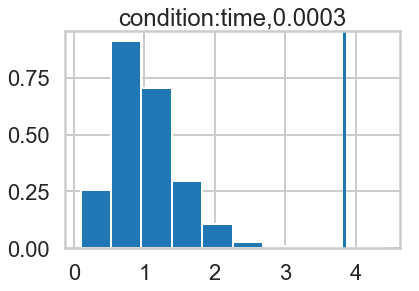

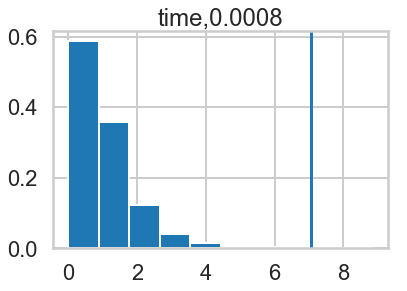

In [149]:
for k,df_sub in results.groupby(['index']):
    fig,ax = plt.subplots()
    ax.hist(df_sub['F Value'].values,density=True)
    ax.axvline(res.anova_table['F Value'][k])
    ax.set(title = f"{k},{(np.sum(df_sub['F Value'].values > res.anova_table['F Value'][k]) + 1) / 1e4}")